In [1]:
#library to measure the FLOPs
!pip install thop

In [2]:
import torch
import torch.nn as nn
import timeit
from thop import profile
import matplotlib.pyplot as plt
from torchvision.models import alexnet
from torchvision.models import resnet50
from torchvision.models import vgg16
import seaborn as sns

In [3]:
#list for storing flops and time for each model

''' AlexNet '''
flops_list_alexnet=[]
time_list_alexnet=[]

''' VGG16 '''
flops_list_vgg16=[]
time_list_vgg16=[]

''' ResNet '''
flops_list_resnet=[]
time_list_resnet=[]

''' Single Conv Layer '''
flops_list_conv=[]
time_list_conv=[]

In [4]:
''' Different values for evaluating time and flops '''

batch_size=[1,2,4,8]
in_channel=[3,3,3,3]
out_channel=[16,32,64,128]
height=[112,112,224,224]
width=[112,112,224,224]
kernel_size=[1,3,5,7]
stride=[1,1,1,1]

In [5]:
''' Single Conv layer model '''
class one_conv_model(torch.nn.Module):
  def __init__(self,in_channel, out_channel, kernel_size, stride):
    super().__init__()

    self.net=nn.Sequential(
        nn.Conv2d(in_channels=in_channel, out_channels=out_channel,kernel_size=kernel_size,stride=stride)
    )
  def forward(self,x):
    x=self.net(x)
    return x

In [6]:
''' Function to compute flops and time for each model for different parameter values '''

def compute_flops_time():
  ''' Loop through each model'''
  for i in range(len(batch_size)):
    input=torch.randn(batch_size[i], in_channel[i], height[i], width[i])
    
    alexnet_model=alexnet()
    macs, params = profile(alexnet_model, inputs=(input,))
    flops_list_alexnet.append(macs)
    t = timeit.repeat(lambda: alexnet_model(input), number=5, repeat=5)
    avg_time=sum(t)/len(t)
    time_list_alexnet.append(avg_time)

    #VGG16 model
    vgg_model=vgg16()
    macs, params = profile(vgg_model, inputs=(input,))
    flops_list_vgg16.append(macs)
    t = timeit.repeat(lambda: vgg_model(input), number=5, repeat=5)
    avg_time=sum(t)/len(t)
    time_list_vgg16.append(avg_time)

    #ResNet model
    resnet_model=resnet50()
    macs, params = profile(resnet_model, inputs=(input,))
    flops_list_resnet.append(macs)
    t = timeit.repeat(lambda: resnet_model(input), number=5, repeat=5)
    avg_time=sum(t)/len(t)
    time_list_resnet.append(avg_time)
    
    #single conv layer
    my_model=one_conv_model(in_channel[i], out_channel[i], kernel_size[i], stride[i])
    macs, params = profile(my_model, inputs=(input,))
    flops_list_conv.append(macs)
    t = timeit.repeat(lambda: my_model(input), number=5, repeat=5)
    avg_time=sum(t)/len(t)
    time_list_conv.append(avg_time)

In [7]:
''' Different kind of plots'''
def plot_as_line():
  plt.plot(flops_list_alexnet, time_list_alexnet, color='r', label='alexnet')
  plt.plot(flops_list_vgg16, time_list_vgg16, color='g', label='vggnet')
  plt.plot(flops_list_resnet, time_list_resnet, color='b', label='resnet')
  plt.plot(flops_list_conv, time_list_conv, color='y', label='single conv')
  plt.legend()
  plt.xlabel("FLOPs")
  plt.ylabel("Time (second)")
  plt.title("FLOPs vs. Time")


def plot_as_circles():
  plt.plot(flops_list_alexnet, time_list_alexnet, 'o', label='alexnet')
  plt.plot(flops_list_vgg16, time_list_vgg16, 'o', label='vggnet')
  plt.plot(flops_list_resnet, time_list_resnet, 'o', label='resnet')
  plt.plot(flops_list_conv, time_list_conv, 'o', label='single conv')
  plt.legend()
  plt.xlabel("FLOPs")
  plt.ylabel("Time (second)")
  plt.title("FLOPs vs. Time")


def plot_with_zoom():
  fig, ax = plt.subplots()
  sns.scatterplot(flops_list_alexnet, time_list_alexnet, ax=ax, label='alexnet')
  sns.scatterplot(flops_list_vgg16, time_list_vgg16, ax=ax, label='vgg16')
  sns.scatterplot(flops_list_resnet, time_list_resnet, ax=ax, label='resnet')
  sns.scatterplot(flops_list_conv, time_list_conv, ax=ax, label='single conv')
  ax.set_title('FLOPs vs Time')
  ax.set_xlabel('FLOPs')
  ax.set_ylabel('Time')

  ax2 = plt.axes([1, 0.6, .4, .4], facecolor='w') #bottom, left, width, height
  sns.scatterplot(flops_list_alexnet, time_list_alexnet, ax=ax2)
  sns.scatterplot(flops_list_vgg16, time_list_vgg16, ax=ax2)
  sns.scatterplot(flops_list_resnet, time_list_resnet, ax=ax2)
  sns.scatterplot(flops_list_conv, time_list_conv, ax=ax2)
  ax2.set_title('zoom')
  ax2.set_xlim([0.,0.10e11])

In [ ]:
compute_flops_time()

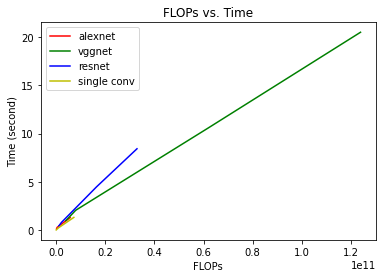

In [9]:
plot_as_line()

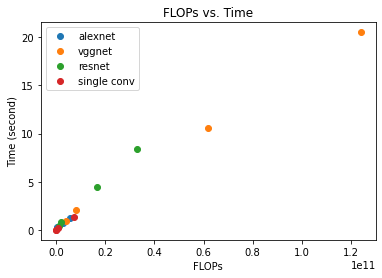

In [10]:
plot_as_circles()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

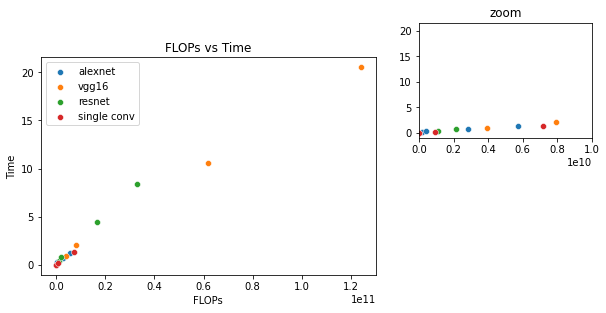

In [12]:
plot_with_zoom()